Name: Shahid Ali Khowaja

Student ID: 23034289

In [94]:
# import libaraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import skew, kurtosis

In [95]:
# Load data from csv for DataFrame
df = pd.read_csv('Mall_Customers.csv')
# Remove all null data
df = df.dropna()

In [96]:
# Display Data Frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [97]:
# Summary Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [98]:
# Calculate correlation matrix
df_numeric = df.drop(columns=['CustomerID','Gender'])
df_numeric.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [99]:
# Calculate skewness for each numerical column
df_numeric.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [100]:
# Calculate kurtosis for each numerical column
df_numeric.kurtosis()

Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [101]:
# Histogram of Age
def plot_age():
    """
    Create a Histogram of Age.

    This function creates a plot with the frequency and age.
    """
    # Increase figure size
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Age'], bins=20, color='Red')
    # Set labels and title of x axis and y axis
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.savefig('age.png')
    #display graph
    plt.show()

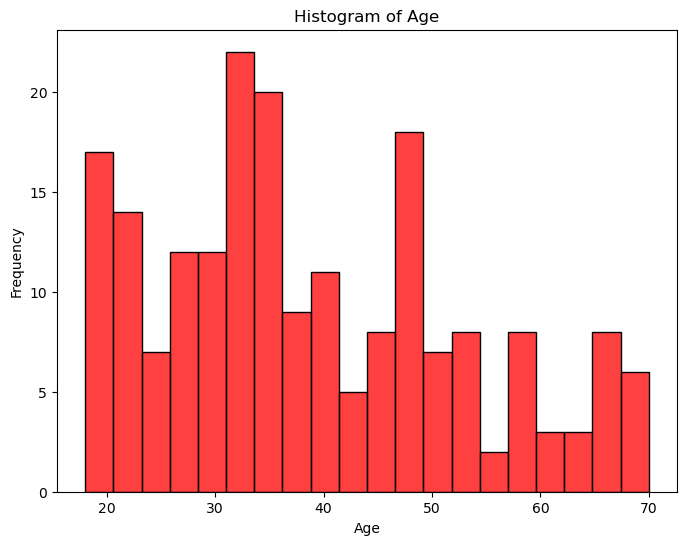

In [102]:
plot_age()

In [103]:
# Pie chart of Gender
def plot_gender():
    
    """
    Create a Pie chart of Gender.

    This function creates a distribution of gender.
    """
    #count value of personal value
    gender_count = df['Gender'].value_counts(dropna = False)
    # Increase figure size
    plt.figure(figsize=(8, 6))
    print(gender_count)
    plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['red', 'green'])
    
    # Set title
    plt.title('Distribution of Gender')
    plt.legend()
    plt.savefig('gender.png')
    #display graph
    plt.show()

Gender
Female    112
Male       88
Name: count, dtype: int64


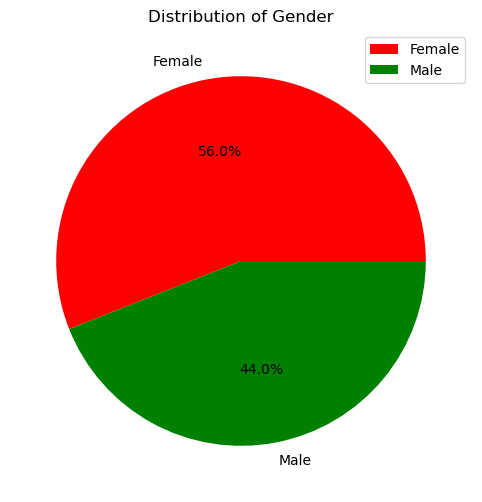

In [104]:
plot_gender()

In [105]:
# Looking at some real data, where we don't know the number of clusters already
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col])

C:\Users\Shahid Ali Khawaja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


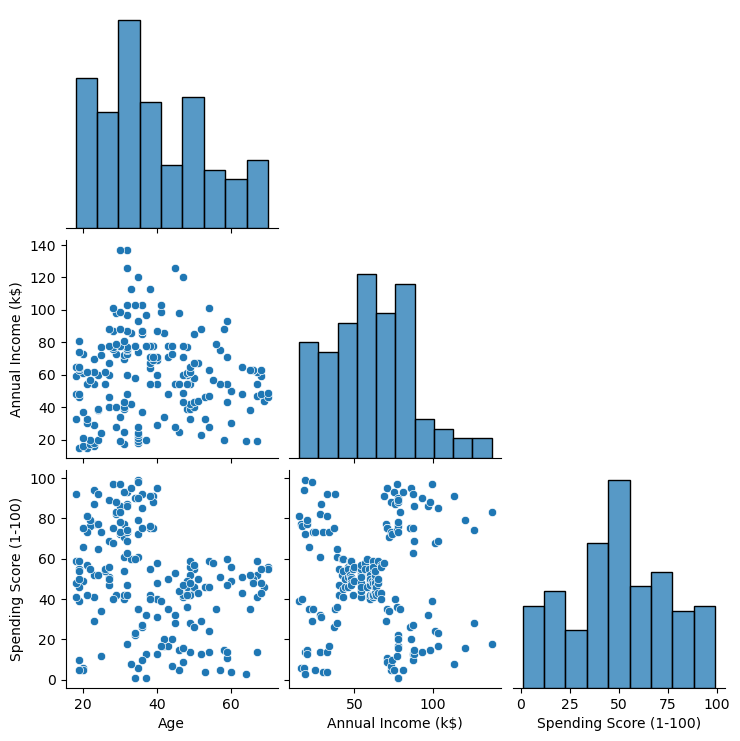

In [106]:
sns.pairplot(df_numeric, corner=True)
plt.savefig("cluster.png")
plt.show()

In [107]:
def plot_heat_map():
    """
    Create a heat map.

    This function creates a correlation of heatmap.
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    mask = np.triu(np.ones_like(df_numeric.corr(numeric_only=True)))
    sns.heatmap(df_numeric.corr(numeric_only=True), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title('Heatmap')
    plt.savefig("heatmap.png")
    plt.show()

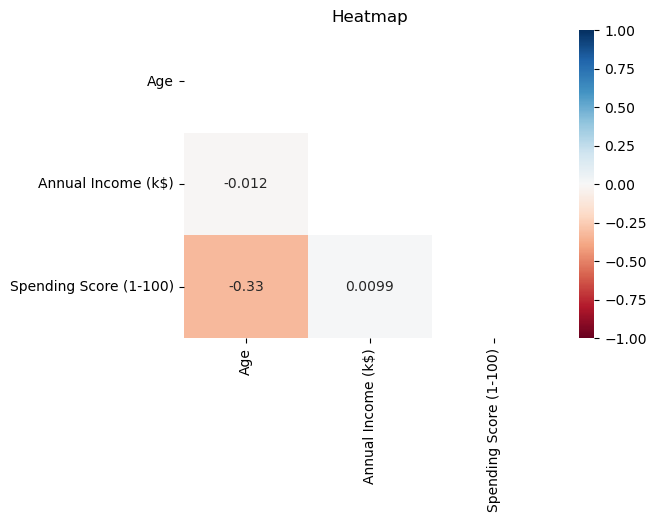

In [108]:
plot_heat_map()

In [109]:
from sklearn.preprocessing import MinMaxScaler
df_cut = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_cut)
inv_norm = scaler.inverse_transform(norm)

In [110]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [111]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")


 2 clusters silhoutte score = 0.33
 3 clusters silhoutte score = 0.45
 4 clusters silhoutte score = 0.50
 5 clusters silhoutte score = 0.56
 6 clusters silhoutte score = 0.54
 7 clusters silhoutte score = 0.52
 8 clusters silhoutte score = 0.43
 9 clusters silhoutte score = 0.44
10 clusters silhoutte score = 0.45
Best number of clusters =  5


In [112]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    plt.title('Elbow')
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.savefig("elbow.png")
    plt.show()
    return

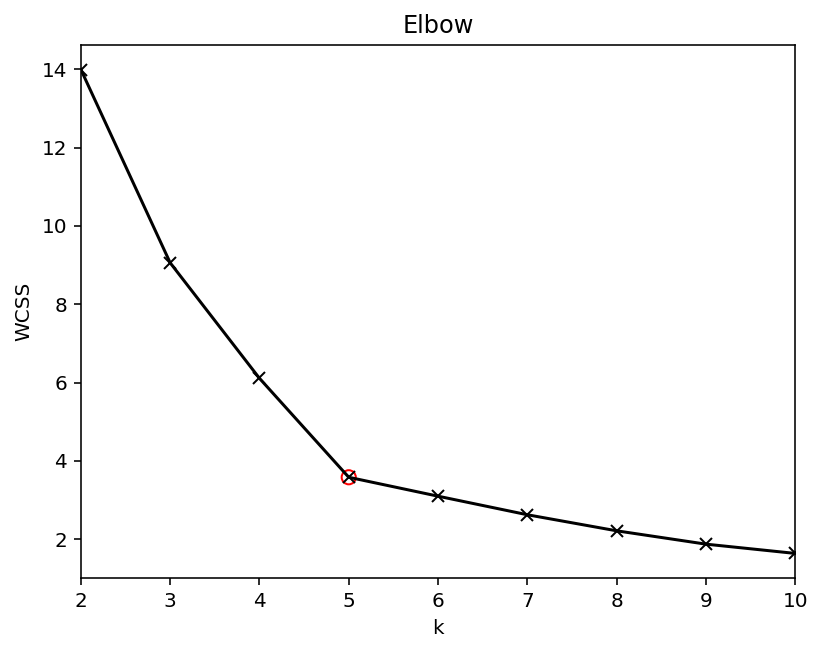

In [113]:
plot_elbow_method(2, 10, wcss, best_n)

In [114]:
#Scatter plot of Annual Income (k$) vs. Spending Score (1-100)
# K-Means Clustering
# Assuming we're clustering based on Annual Income (k$) and Spending Score (1-100)
def plot_fitted_clusters():
    """
    Create Scatter plot of Annual Income (k$) vs. Spending Score (1-100).

    This function creates a scatter k-means cluster.
    """
    X = df_numeric[['Annual Income (k$)', 'Spending Score (1-100)']]
    kmeans = KMeans(n_clusters=best_n, random_state=42, n_init=10)
    df_numeric['Cluster'] = kmeans.fit_predict(X)
    centers = df_numeric.groupby('Cluster').mean()
    xcent = centers['Annual Income (k$)']
    ycent = centers['Spending Score (1-100)']
    # Increase figure size
    plt.figure(figsize=(8, 6))
    # plot scatter based on age, income to apply cluster
    plt.scatter(df_numeric['Annual Income (k$)'], df_numeric['Spending Score (1-100)'], c=df_numeric['Cluster'], cmap='viridis', label="Data")
    plt.plot(xcent, ycent, 'kD', markersize=10, label='True Centers')
    plt.plot(xcent, ycent, 'bs', ms=10, label='Estimated Centres')
    # Set labels and title of x axis and y axis
    plt.title('K-Means Clustering: Annual Income (k$) vs. Spending Score (1-100)')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.savefig('scatter.png')
    #display graph
    plt.show()

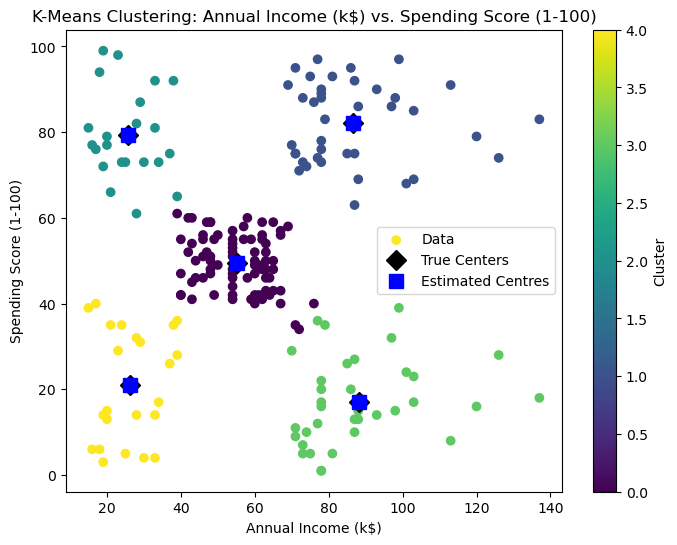

In [115]:
plot_fitted_clusters()

In [116]:
from scipy.optimize import curve_fit
import scipy.stats as ss

# skip 2 rows and 2 header row
skip_rows = 2
header_row = 2

# Read the CSV file into a DataFrame, skipping the specified number of rows
df_gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26.csv", skiprows=skip_rows,header=1)


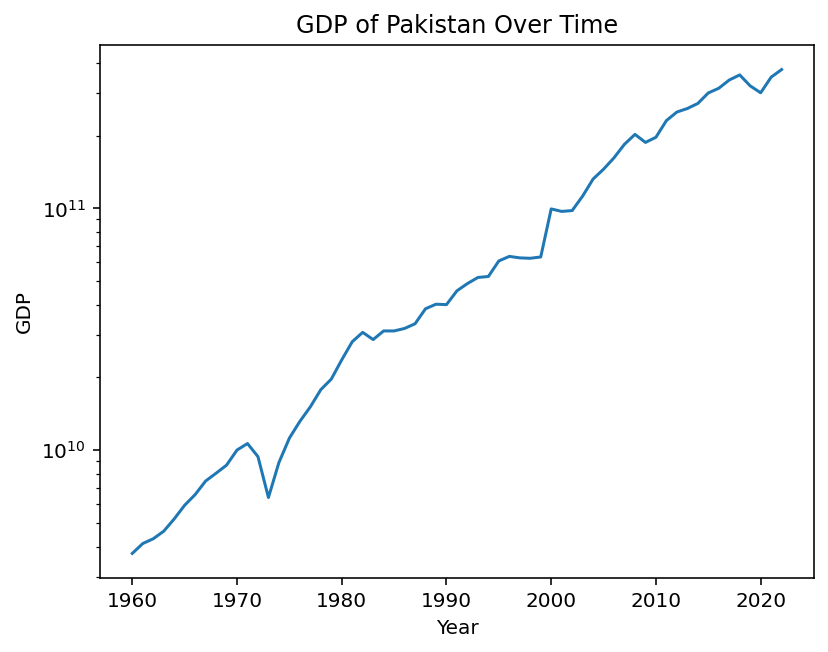

In [117]:
pakistan_df = df_gdp[df_gdp["Country Name"] == "Pakistan"]
# Extract years and GDP values
years = pakistan_df.columns[4:67]  # Assuming the years start from the 5th column
gdp_values = pakistan_df.iloc[0, 4:67]  # Assuming the first row contains the GDP values

# Convert years to integers
years = years.astype(int)

# Plot the data
fig, ax = plt.subplots(dpi=144)
ax.plot(years, gdp_values, linestyle='-')
# set label and title
ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.set_ylabel('GDP')
ax.set_xlabel('Year')
ax.set_title('GDP of Pakistan Over Time')
# display plot
plt.show()

In [118]:
def exponential(t, n0, g):
    """
    Calculates exponential function with scale factor n0 and growth rate g.
    """
    
    f = n0 * np.exp(g*t)
    
    return f

In [119]:
def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    """
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [120]:

# Let's normalize the time frame, assuming 'years' is a pandas Series
numeric_index = (years - 1960).values.flatten()

# Fit the curve using curve_fit
p, cov = curve_fit(exponential, numeric_index, gdp_values, p0=(1.2e12, 0.03))

# Get uncertainties on each parameter
sigma = np.sqrt(np.diag(cov))

print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
print(f"g = {p[1]:.2f} +/- {sigma[1]:.2f}")

N0 = 7.70125e+09 +/- 9.01326e+08
g = 0.06 +/- 0.00


In [121]:
numeric_index = (years - 1960).values
p, cov = curve_fit(logistic, numeric_index, gdp_values,
                  p0=(1.2e12, 0.03, 10))
gdp_2024 = logistic(2024 - 1960, *p)  # remember to subtract the 1960 as we did when 'training'
print(f"GDP in 2024: {gdp_2024:g}")

GDP in 2024: 3.91632e+11


In [122]:
# take 1000 normal random samples for each parameter
sample_params = ss.multivariate_normal.rvs(mean=p, cov=cov, size=1000)

# standard deviation of all possible parameter sampling
gdp_unc_2024 = np.std(logistic(2024 - 1960, *sample_params.T))  # note the transpose

print(f"GDP in 2024: {gdp_2024:g} +/- {gdp_unc_2024:g}")

GDP in 2024: 3.91632e+11 +/- 9.90874e+09


In [123]:
def plot_fitting():
    """
    Calculates gdp predication function logistic.
    """
    fig, ax = plt.subplots(dpi=144)
    # create array of values within data, and beyond
    time_predictions = np.arange(1960, 2024, 5)
    # determine predictions for each of those times
    gdp_predictions = logistic(time_predictions - 1960, *p)
    # determine uncertainty at each prediction
    gdp_uncertainties = [np.std(logistic(future_time - 1960, *sample_params.T)) for future_time in time_predictions]

    ax.plot(years, gdp_values, 'b-', label='Data')
    ax.plot(time_predictions, gdp_predictions, 'k-', label='Logistic Fit')
    ax.fill_between(time_predictions, gdp_predictions - gdp_uncertainties, gdp_predictions + gdp_uncertainties, 
                    color='gray', alpha=0.5)
    # set label and title
    ax.set_xlabel('Time')
    ax.set_ylabel('GDP')
    ax.set_yscale('log')
    ax.set_title('GDP of Pakistan Over Time')
    ax.legend()
    # save image
    plt.savefig('logistic-fit.png')
    # display plot
    plt.show()

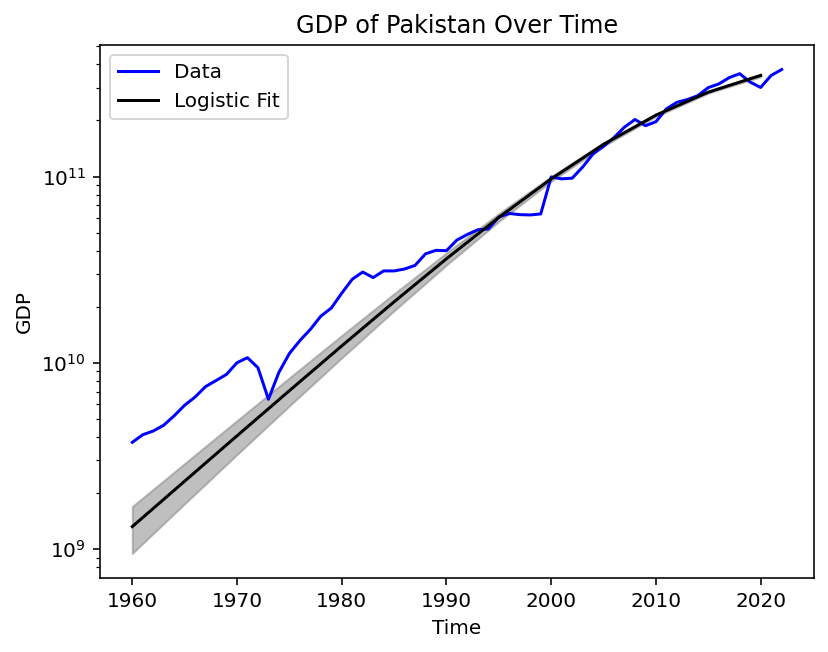

In [124]:
plot_fitting()